In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp
from IPython import display

### EXAMPLE 2.1
A stirred-tank blending process with a constant liquid holdup of 2 $m^3$ is used to blend two streams whose densities are both approximately 900 $kg/m^3$. The density does not change during mixing.

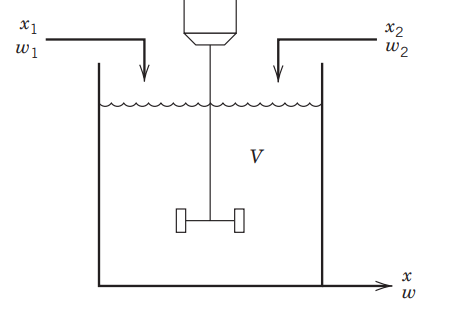

**(a)** Assume that the process has been operating for a long period of time with flow rates of $w_1$ = 500 kg/min and
$w_2$ = 200 kg/min, and feed compositions (mass fractions) of $x_1$ = 0.4 and $x_2$ = 0.75. What is the steady-state value of x?

since the process at steady state then:   
$$\frac{dx}{dt}=0=\frac{w_1}{\rho V}(x_1-x)+\frac{w_2}{\rho V}(x_2-x)$$

re-arrange the above equation we get:
$$x=\frac{w_1x_1 +w_2x_2}{w1+w2}$$

In [73]:
# given parameters
V=2 # m3
rho=900 # kg/m3
w1=500 # 500kg/min
w2=200 # kg/min
x1=0.4
x2=0.75
x=(w1*x1+w2*x2)/(w1+w2)
print(f"The composition at steady state will be at x = {x:.3f}")

The composition at steady state will be at x = 0.500


**(b)** Suppose that $w_1$ changes suddenly from 500 to 400 kg/min and remains at the new value. Determine an expression for x(t) and plot it.

if we want to know the new steady state after the change we can repeate the same calculation in (a) but
using different value for $w_1$

In [74]:
w1=400 # kg/min
x=(w1*x1+w2*x2)/(w1+w2)
print(f"The new steady state will be at x = {x:0.3f}")

The new steady state will be at x = 0.517


However, the question is asking us to plot how x reached to the new steady-state over time?
So, we have to use the differential equations that model the tank:

$$\frac{d(\rho V)}{dt}=w_1+w_2-w\\
\frac{dx}{dt}=\frac{w_1}{\rho V}(x_1-x)+\frac{w_2}{\rho V}(x_2-x)\\
\rho \bar{V}\frac{dx}{dt}=w_1(x_1-x)+w_2(x_2-x)\\
\rho \bar{V}\frac{dx}{dt}=w_1x_1-w_1x+w_2x_2-w_2x\\
\rho \bar{V}\frac{dx}{dt}=w_1x_1+w_2x_2-x(w_2+w_1)\\
\rho \bar{V}\frac{dx}{dt}=w_1x_1+w_2x_2-xw\\
\frac{\rho \bar{V}}{w}\frac{dx}{dt}=\frac{w_1x_1+w_2x_2}{w}-x\\
\tau\frac{dx}{dt}+x=\beta\\
\text{where,}\quad \tau=\frac{\rho \bar{V}}{w}\\
 \quad \quad \beta=\frac{w_1x_1+w_2x_2}{w}
$$

using sympy python package to solve the differential equation:

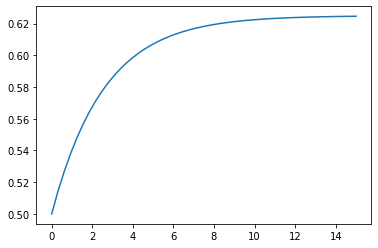

In [91]:
tau,beta,t=sp.symbols("tau beta t",positive=True)
x=sp.Function("x")(t)
ode=sp.Eq(tau*x.diff(t)+x,beta)

# initial conditions
ics={x.subs(t,0):0.5}

#solving the differential equation with initial condition above
sol=sp.dsolve(ode,x,ics=ics).subs({beta:(w1*x1+w2*x2)/(w1+w2),tau:rho*V/w})

f=sp.lambdify(t,sol.rhs)
tn=np.linspace(0,15)
plt.plot(tn,f(tn))

**(c)** Repeat part **(b)** for the case where $w_2$ (instead of $w_1$) changes suddenly from 200 to 100 kg/min and remains
there.

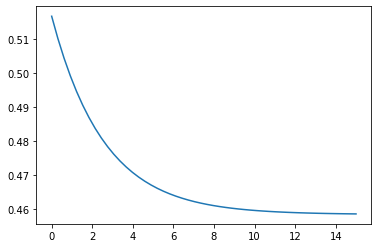

In [76]:
xi=(w1*x1+w2*x2)/(w1+w2)
w2=100 # kg/min
w1=500 # kg/min
# initial conditions
ics={x.subs(t,0):xi}

#solving the differential equation with initial condition above
sol=sp.dsolve(ode,x,ics=ics).subs({beta:(w1*x1+w2*x2)/(w1+w2),tau:rho*V/w})

f=sp.lambdify(t,sol.rhs)
tn=np.linspace(0,15)
plt.plot(tn,f(tn))

**(d)** Repeat part **(c)** for the case where $x_1$ suddenly changes
from 0.4 to 0.6 (in addition to the change in $w_2$).

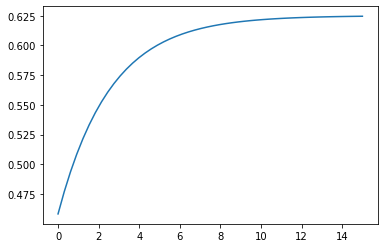

In [77]:
xi=(w1*x1+w2*x2)/(w1+w2)
w2=100 # kg/min
w1=500 # kg/min
x1=.6
# initial conditions
ics={x.subs(t,0):xi}

#solving the differential equation with initial condition above
sol=sp.dsolve(ode,x,ics=ics).subs({beta:(w1*x1+w2*x2)/(w1+w2),tau:rho*V/w})

f=sp.lambdify(t,sol.rhs)
tn=np.linspace(0,15)
plt.plot(tn,f(tn))

**(e)** For parts **(b)** through **(d)**, plot the normalized response $x_N(t)$,
$$x_N(t) = \frac{x(t) − x(0)}{
x(∞) − x(0)}$$


In [82]:
(sol.rhs-sol.rhs.subs(t,0))/(sp.limit(sol.rhs,t,sp.oo)-sol.rhs.subs(t,0))


1.0 - 1.0*exp(-0.388888888888889*t)

for part **(b)**

In [96]:
# initial conditions
ics={x.subs(t,0):0.5}

#solving the differential equation with initial condition above
sol=sp.dsolve(ode,x,ics=ics)
(sol.rhs-sol.rhs.subs(t,0))/(sp.limit(sol.rhs,t,sp.oo)-sol.rhs.subs(t,0))

(beta + (0.5 - beta)*exp(-t/tau) - 0.5)/(beta - 0.5)

The individual responses have the same normalized response:
$$\frac{x(t) − x(0)}{x(∞) − x(0)} = 1 − e^{−\frac{t}{\tau}}$$

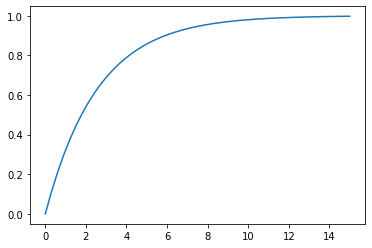

In [83]:
fn=(sol.rhs-sol.rhs.subs(t,0))/(sp.limit(sol.rhs,t,sp.oo)-sol.rhs.subs(t,0))
fn=lambdify(t,fn)
plt.plot(tn,fn(tn))